<a href="https://colab.research.google.com/github/sadikinisaac/harberman/blob/master/haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
import io
haber = pd.read_csv(io.BytesIO(uploaded['haberman.csv']))

haber.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
haber.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
#1 Number of Data Points

haber.shape #We have 306 rows and 4 columns along with the class label

(305, 4)

In [8]:
#2 Number of Features

haber.columns #We have 3 featues and 1 class label

Index(['30', '64', '1', '1.1'], dtype='object')

In [0]:
#Description of Features
#1.Age : Age of patient at time of operation (numerical).
#2.Year : Patient's year of operation (numerical).
#3.Nodes : Number of positive axillary nodes detected(numerical)(The axillary nodes are a group of lymph nodes located in the axillary (or armpit) region of the body. They perform the vital function of filtration and conduction of lymph)
#4.Status : Survival status (class attribute) 
            # 1 = the patient survived 5 years or longer.
            # 2 = the patient died within 5 years.

In [11]:
haber=haber.set_axis(['age','year','nodes','status'],axis=1, inplace=False)

#3 Number of classes

haber.status.value_counts() 

# There are two classes:
    #1. There 225 patients who survived 5 years or longer
    #2. There are 81 patients who died within 5 years

1    224
2     81
Name: status, dtype: int64

In [12]:
#Since the class label classifies two things i.e survived or not ,
#we can convert 1 and 2 values to "yes" and "No" respectively

hab = haber
haber.status[haber.status == 1] = "yes"
haber.status[haber.status == 2] = "no"
haber.head(10)

,age,year,nodes,status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes
5,33,60,0,yes
6,34,59,0,no
7,34,66,9,no
8,34,58,30,yes
9,34,60,1,yes


In [13]:
# 4 Data-points per class

haber['status'].value_counts()
# yes = 225
# no = 81

yes    224
no      81
Name: status, dtype: int64

In [0]:
#5 Objective

# Given any new features i.e 'age','year','nodes' , we have to classify whether 
    # "yes": A patient would survive more than 5 years.
    # "no": A patient would die within 5 years.

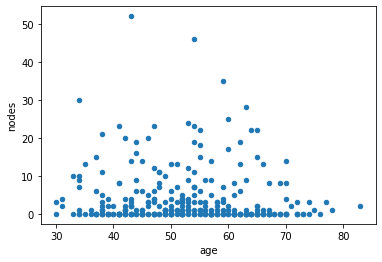

In [14]:
#6.1   2-D Scatter Plot

haber.plot(x='age',y='nodes',kind='scatter')

# We cannot infer much from this plot,
#so lets try coloring them based on class label using seaborn

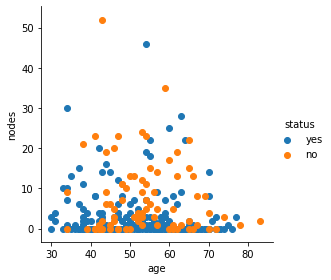

In [15]:
# 6.2   2-D Scatter Plot using color coding for each "STATUS" class

sns.FacetGrid(haber,hue='status',height=4)\
   .map(plt.scatter,"age","nodes")\
   .add_legend()
plt.show()

# plotting 2-d scatter plot on "year" and "nodes".

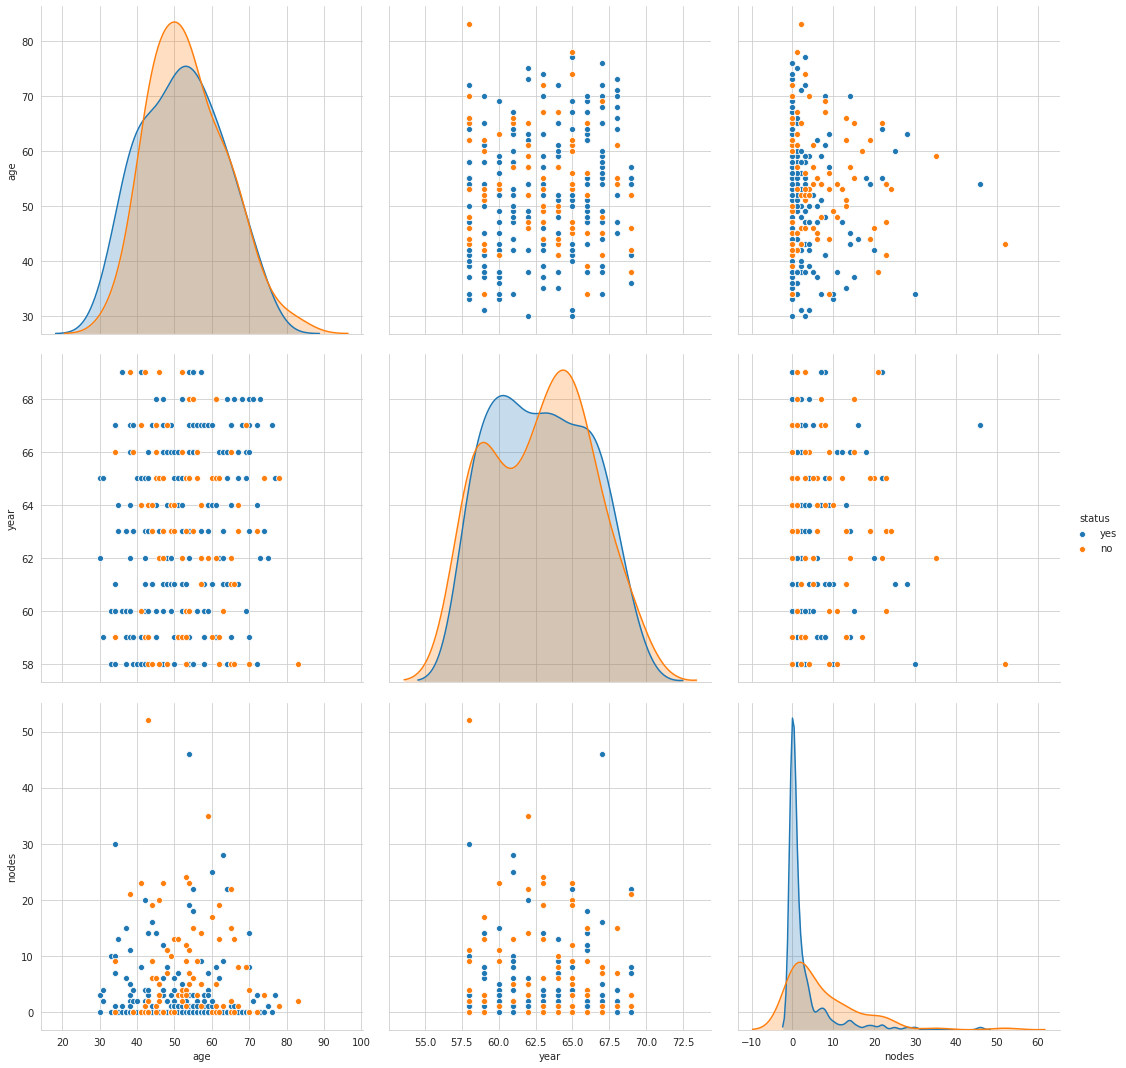

In [16]:
# 6.3   Pair Plots

sns.set_style("whitegrid");
sns.pairplot(haber,hue='status',height=5)

# Let's try to visualize between all the plots i.e 3C2 = 3 plots ,
# We'll observe the 3 plots above the diagonal elements below

In [0]:
#Observations(approx):
# Almost all the plots are overlapped,
#but still we can make some conclusions from them:
#1.If we see the plot between age and nodes ,
#if no. of axillary nodes in between 10-20 and age between 30-40,
#we can observe that only 3 of the patients did not survive ,
#but rest of them survived.

In [0]:
#Lets now see the Univariate analysis i.e using one feature at a time

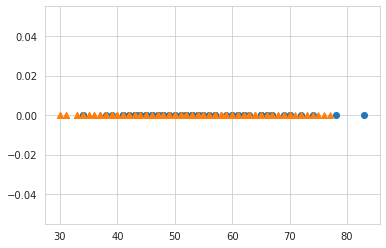

In [17]:
# 7.1  1-D Scatter plot

# Lets see 1-D Scatter plot
haber_yes = haber[haber['status']=='yes']
haber_no = haber[haber['status']=='no']
plt.plot(haber_no['age'],np.zeros_like(haber_no['age']),'o')
plt.plot(haber_yes['age'],np.zeros_like(haber_yes['age']),'^')

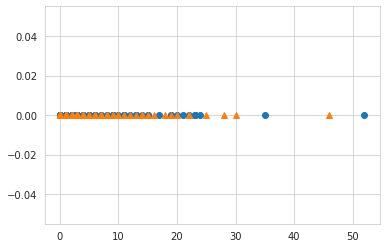

In [18]:
plt.plot(haber_no['nodes'],np.zeros_like(haber_no['nodes']),'o')
plt.plot(haber_yes['nodes'],np.zeros_like(haber_yes['nodes']),'^')

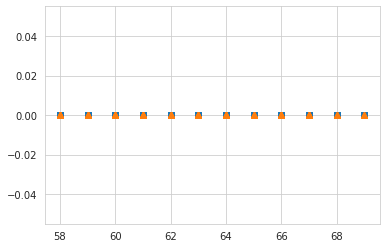

In [19]:
plt.plot(haber_no['year'],np.zeros_like(haber_no['year']),'s')
plt.plot(haber_yes['year'],np.zeros_like(haber_yes['year']),'^')

In [0]:
#Observations:
#1.By using 1-D scatter plot we cannot see even any small usefull information 
#as both the classes are almost completely overlapped

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


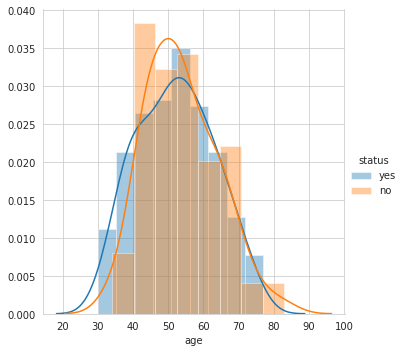

In [20]:
#7.2   Histograms and PDF

sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

In [0]:
#Observations(approx):

#1.The probability of patients surviving between the age 51 and 55 is 
#more than not surviving


#2.The probability of patients not surviving between the age 40 and 45 is 
#more than surviving

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


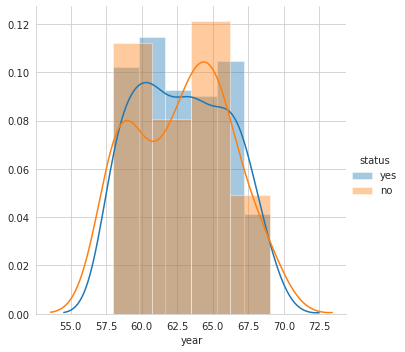

In [21]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

In [0]:
#Observations(approx):

#1.The probability of patients surviving between the years 1960 and 61 is more
#2.The probability of patients not surviving between the years 1963 and 66 is more

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


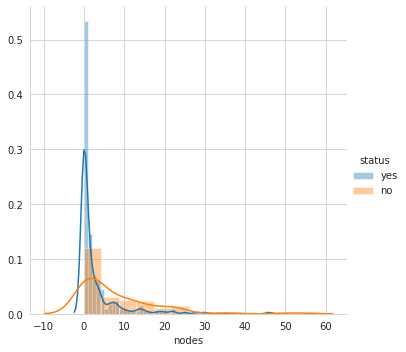

In [22]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

In [0]:
#Observations(approx):
#1.The probability of patients surviving who have axilliary nodes=1 is more

#2.The probability of patients not surviving who have axilliary nodes 
#between 0-5 is more

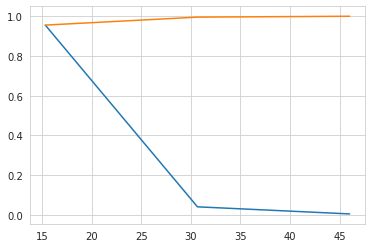

In [23]:
#7.3  PDF and CDF

# For Status="yes"
counts,bin_edges = np.histogram(haber_yes['nodes'],bins=3,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# # For Status="no"
# counts,bin_edges = np.histogram(haber_no['nodes'],bins=10,density=True)
# pdf = counts/sum(counts)
# cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:],pdf)
# plt.plot(bin_edges[1:],cdf)

In [0]:
#Observations:
#1.Orange line is CDF and Blue line is PDF
#2.The probability of finding auxillary nodes greater than 30 is less than 0.05 

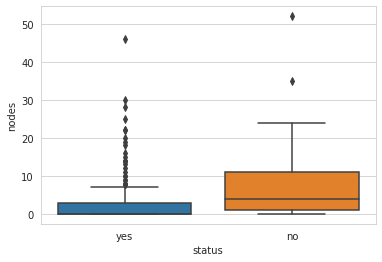

In [24]:
#  7.4   Box and Violen PLots


#box plot
sns.boxplot(x='status',y='nodes',data=haber)

In [0]:
#Observations:
#1.For the Class "NO" ,most of the points lie in between 50th%-75th%,so,
#most of the patients who have axillary nodes 
#>5 and<11 have high chances of not surviving

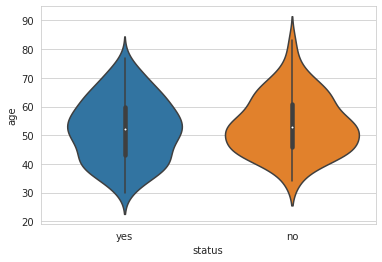

In [25]:
#violin plot

sns.violinplot(x='status',y='age',data=haber)

In [0]:
#Overall Observations:


#1.There 225 patients who survived 5 years or longer and 
#There are 81 patients who died within 5 years

#2.The no. of unique years are 12

#3.If we see the plot between age and nodes ,
#if no. of axillary nodes in between 10-20 and age between 30-40,we can observe       
#that only 3 of the patients did not survive ,but rest all of them survived.

#4.Below table gives some statistical analysis on features : age,year,nodes

In [26]:
haber.describe()

,age,year,nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000
